# Importy 

In [ ]:
!nvcc --version
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git

%load_ext nvcc_plugin

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-90amzoua
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-90amzoua
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-cp37-none-any.whl size=4307 sha256=675edd1870dc3c8338905cb821259bbf7a9c796a7094d6ce42cb530ffe9e9977
  Stored in directory: /tmp/pip-ephem-wheel-cache-6t7id5eu/wheels/10/c2/05/ca241da37bff77d60d31a9174f988109c61ba989e4d4650516
Successfully built NVCCPlugin
created output directory at /content/src
Out bin /content/result.out


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA 




In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Wczytanie i przygotowanie danych

In [ ]:
# Wczytujemy dane:  
data = pd.read_csv('/content/drive/My Drive/car.data.csv', header = None) 

In [ ]:
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
# Zmiana nazw kolumny i wyświetlenie informacji 
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names

for col in col_names:
    print(data[col].value_counts())

vhigh    432
high     432
low      432
med      432
Name: buying, dtype: int64
vhigh    432
high     432
low      432
med      432
Name: maint, dtype: int64
4        432
2        432
5more    432
3        432
Name: doors, dtype: int64
4       576
2       576
more    576
Name: persons, dtype: int64
small    576
big      576
med      576
Name: lug_boot, dtype: int64
high    576
low     576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [ ]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,4,4,small,high,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
# Podsumowanie danych
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
# Sprawdzenie czy w bazie występują jakieś brakujące wartości
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# Wykresy przedstawiające liczbę unikalnych wartości w kolumnie

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

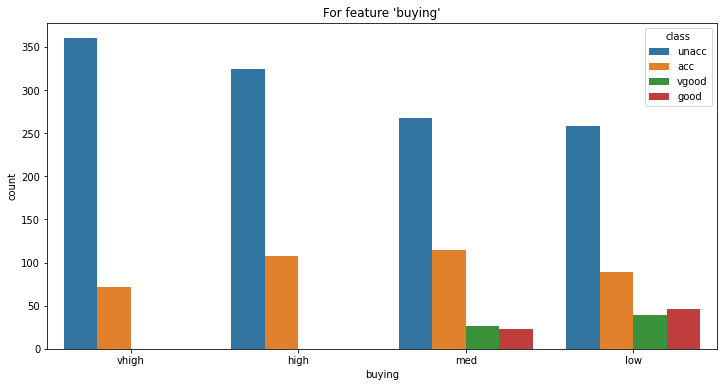

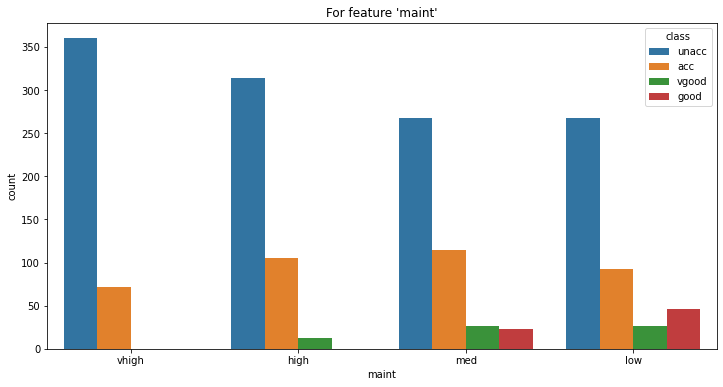

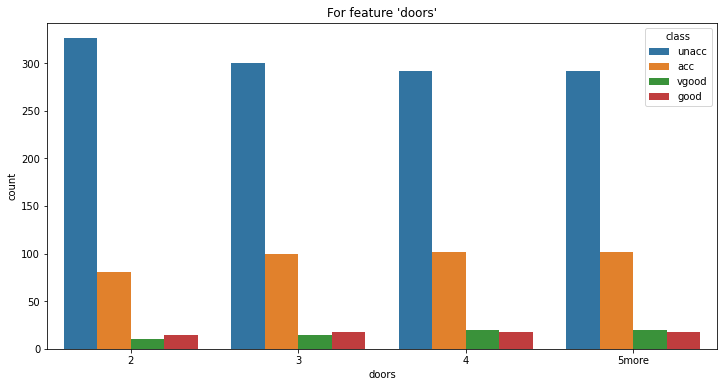

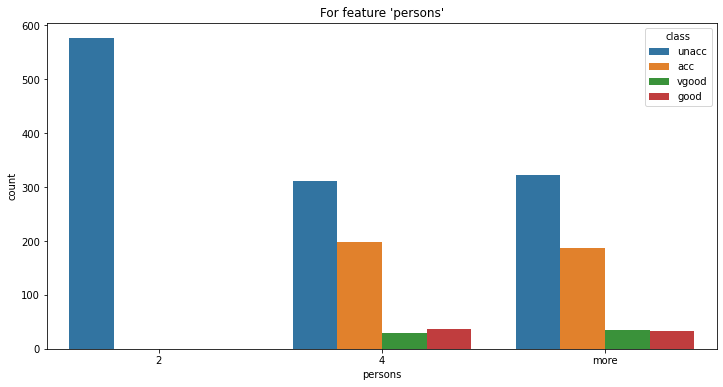

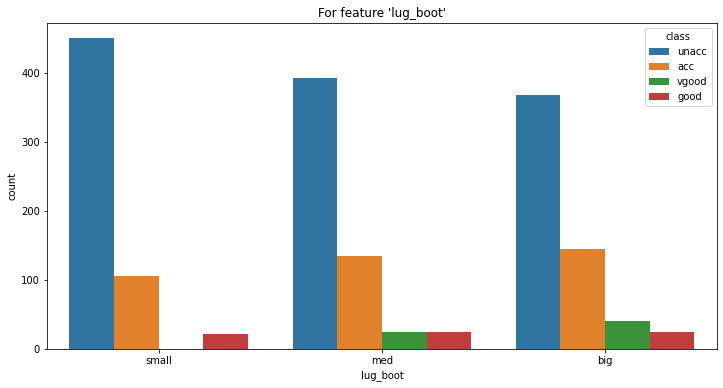

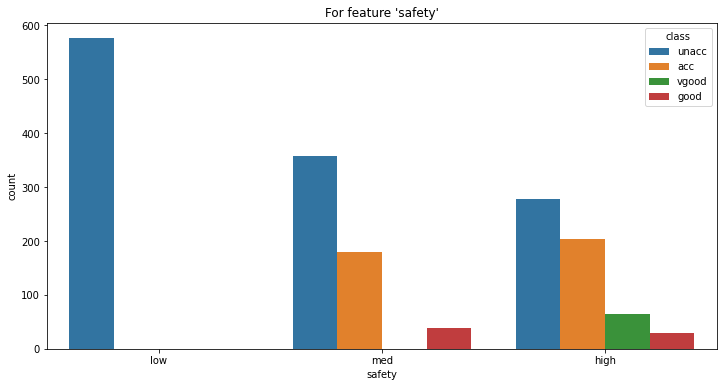

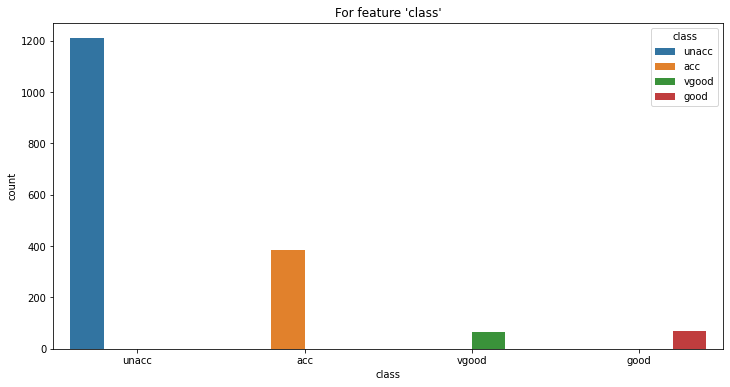

In [ ]:

for i in data.columns:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['class'])

Ponieważ algorytmy scikit-learn na ogół nie działają z wartościami łańcuchowymi, przekonwertowałyśmy kategorie ciągów na liczby całkowite.

In [ ]:
le=LabelEncoder()

for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [ ]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2




# Mapa termiczna kolumn w zestawie danych ze sobą

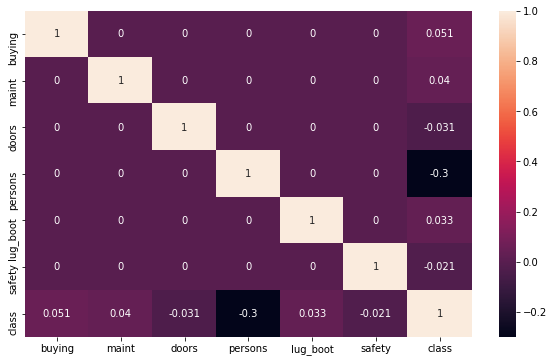

In [ ]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

# Wybór zbioru uczącego i testowego

Pomijając wartości przekątnych można zauważyć, że większość kolumn wykazuje bardzo słabą korelację z „klasą”. Kolumna „osoby” wykazuje słaby związek z „klasą”. Inne kolumny z wyjątkiem "klasy" nie wykazują żadnej korelacji między sobą.

Tak więc wykreślanie tych kolumn ze sobą lub przeprowadzanie na nich jakiejkolwiek analizy może nie dać żadnych produktywnych wyników.



*  X - ramka danych zawierająca dane / cechy wejściowe
*  y - szereg, którego wyniki należy przewidzieć.





In [ ]:
X=data[data.columns[:-1]]
y=data['class']

In [ ]:
# Podział na zbiory testowe, trenujące itd.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=51)


Używamy wyłącznie grupy uczącej i testowej w pythonowym scikit learn mamy taką bardzo prostą funkcję train_test_split. Tak jak nazwa mówi, dzieli nam zbiór na zbiór danych uczących i testujących (bez grupy walidującej). Robi to losowo (jest opcja wyboru odpowiedniego random state). Można odpowiednio dobrać proporcję grupy testowej.

# Algorytm uczenia maszynowego

Random forest to elastyczny, łatwy w użyciu algorytm uczenia maszynowego, który zapewnia, nawet bez dostrajania hiperparametrów, świetne wyniki przez większość czasu. Jest to również jeden z najczęściej używanych algorytmów, ze względu na swoją prostotę i różnorodność (może być stosowany zarówno do zadań klasyfikacyjnych, jak i regresyjnych). Budowany przez niego „las” to zbiór drzew decyzyjnych, zwykle trenowanych metodą „workowania”. Ogólna idea metody pakowania polega na tym, że połączenie modeli uczenia się zwiększa ogólny wynik.Mówiąc prościej: losowy las tworzy wiele drzew decyzyjnych i łączy je w celu uzyskania dokładniejszej i stabilniejszej prognozy

Hiperparametry:

1. n_estimators = liczba drzew w przedpolu
2. max_features = maksymalna liczba cech branych pod uwagę przy dzieleniu węzła
3. max_depth = maksymalna liczba poziomów w każdym drzewie decyzyjnym
4. min_samples_split = minimalna liczba punktów danych umieszczonych w węźle przed podziałem węzła
5. min_samples_leaf = minimalna liczba punktów danych dozwolonych w węźle liścia
6. bootstrap = metoda próbkowania punktów danych (z wymianą lub bez)




In [ ]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

In [ ]:
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=51, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rfc.predict (X_test) 
cnm = confusion_matrix (y_test, y_pred)
print(cnm)

[[ 92   4   2   1]
 [  1  19   0   0]
 [  8   0 293   0]
 [  1   0   0  11]]


In [ ]:
print("Accuracy on test set: ", rfc.score(X_test,y_test)*100,"%")
print("Accuracy on traing set : ", rfc.score(X_train,y_train)*100,"%")

Accuracy on test set:  96.06481481481481 %
Accuracy on traing set :  100.0 %


** **pogrubiony tekst**Optymalizowany** **parametr**: kombinacja liniowa liczb pomyłek z różnymi wagami 

In [ ]:

opt_param = (cnm[0,1] * 3 + cnm[0,2] * 4 + cnm[0,3] * 5 + cnm[1,0] * 6 + cnm[1,2] * 7 + cnm[1,3] * 8 + cnm[2,0] * 8 + cnm[2,1] * 7 + cnm[2,3] * 6 + cnm[3,2] * 3 + cnm[3,1] * 4 + cnm[3,0] * 5)/12

print(opt_param) 

8.333333333333334


Wartość optymalizowanego parametru przy podstawowym użyciu algorytmu to 8,34. Ten parameter musimy minimalizować.

# Funkcja do Macierzy pomyłek


In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Macierz pomyłek dla podstawowego modelu RFC

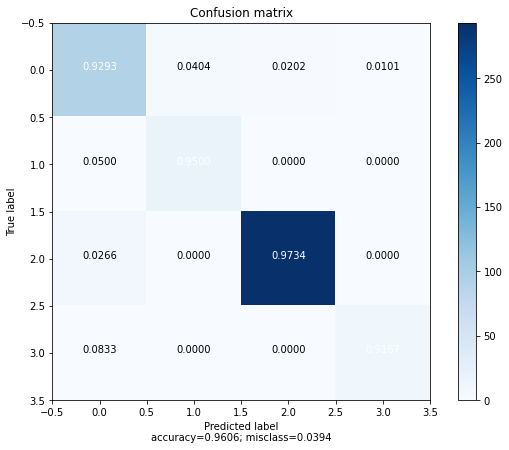

In [ ]:
plot_confusion_matrix(cnm,
                      target_names= None,
                      title='Confusion matrix')

Podstawowy model RFC zapewnia 96% dokładności.





# Znalezienie optymalnych wartości hiperparametrów na siatce (grid search)

Jest to pierwsza metoda jaka powstała i jest bardzo intuicyjna. Przeszukiwanie sieci to technika strojenia hiperparametrów, która może ułatwić zbudowanie modelu i ocenę modelu dla każdej kombinacji parametrów algorytmów na sieć. Polega na tym, że rysujemy siatkę parametrów, które chcemy przetestować. Załóżmy, że chcemy przetestować dwa hiperparametry: max_features (od 1 do 6) oraz n_estimators (6 wartości).

Wówczas możemy wyliczyć 7 x 10 = 70 modeli, aby sprawdzić wszystkie możliwości. Wykorzystując dodatkowo walidację krzyżową przy cv = 10 otrzymalibyśmy 70 x 10 = 700 modeli.

Główna wada tego rozwiązania: czas wyliczenia.

In [ ]:
param_grid={
           'max_features':[2,3,4,5,6,'auto'],
           'n_estimators':[10,20,100,120,150,200],}

In [ ]:
grid=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1,random_state=51), param_grid=param_grid,cv=10,n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=51,
                                   

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

grid.get_params()

{'max_features': 6, 'n_estimators': 20}
0.9822719141323792


{'cv': 10,
 'error_score': nan,
 'estimator': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=51, verbose=0,
                        warm_start=False),
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_sampl

# Macierz pomyłek po optymalizacji parametrów


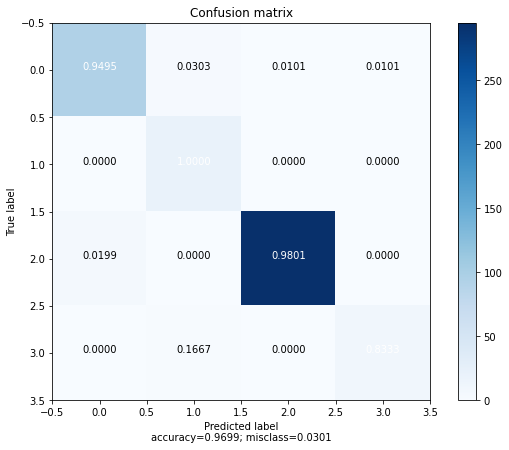

In [ ]:
rfc_opt = RandomForestClassifier(n_estimators=20,n_jobs=-1,random_state=51,max_features=6)
rfc_opt.fit(X_train,y_train)
y_pred_opt = rfc_opt.predict (X_test) 
cnm_opt = confusion_matrix (y_test, y_pred_opt)

plot_confusion_matrix(cnm_opt,
                      target_names= None,
                      title='Confusion matrix')


In [ ]:
print("Accuracy on test set: ", rfc_opt.score(X_test,y_test)*100,"%")
print("Accuracy on traing set : ", rfc_opt.score(X_train,y_train)*100,"%")

Accuracy on test set:  96.99074074074075 %
Accuracy on traing set :  100.0 %


Model RFC z zoptymalizowanymi parametrami zapewnia 97% dokładności.





In [ ]:
# Optymalizowany parametr
opt_param_2 = (cnm_opt[0,1] * 3 + cnm_opt[0,2] * 4 + cnm_opt[0,3] * 5 + cnm_opt[1,0] * 6 + cnm_opt[1,2] * 7 + cnm_opt[1,3] * 8 + cnm_opt[2,0] * 8 + cnm_opt[2,1] * 7 + cnm_opt[2,3] * 6 + cnm_opt[3,2] * 3 + cnm_opt[3,1] * 4 + cnm_opt[3,0] * 5)/12

print(opt_param_2)

6.166666666666667


**Tak więc przy powyższych parametrach RFC wartość optymalzowanego parametru zmieniła się z 8,34 na 6,17.**


# Zbadanie wpływu normalizacji, standaryzacji i PCA

In [ ]:
pca = PCA()

pipe = Pipeline(steps=[('scaler', Normalizer()) , ('pca', PCA()), ('clf', RandomForestClassifier()) ])

param_grid = dict( scaler=['passthrough', Normalizer(), StandardScaler()],
                    clf__n_estimators = [20,50,100,150],
                    clf__n_jobs = [-1],
                    clf__random_state = [51],
                    clf__max_features = [1,2,3,4,5,6],
                    pca__n_components = [1,2,3,4])

search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)



Best parameter (CV score=0.779):
{'clf__max_features': 3, 'clf__n_estimators': 150, 'clf__n_jobs': -1, 'clf__random_state': 51, 'pca__n_components': 4, 'scaler': 'passthrough'}
